In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import warnings
warnings.filterwarnings("ignore")

In [0]:
#Column names are obtained from data set description file. In the data set description file, ? is used to represent missing value. 
col_names = ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
             'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                 sep=',', names=col_names, na_values='?')

In [0]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [0]:
df.isnull().sum().sum()

16

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


From above data set information, we can see that 'Bare Nuclei' contains all the null vaule. Since 16 out of 699  entries is a small percentage, in this case I will drop the entire row of null entries. 

In [0]:
df.dropna(how='any',axis=0,inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null float64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


In [0]:
print('Shape of data set: ' + str(df.shape))
print('Total Number of null value in data set: ' + str(df.isnull().sum().sum()))
print('Total Number of Benign: ' + str(df['Class'].value_counts()[2]))
print('Total Number of Malignant: ' + str(df['Class'].value_counts()[4]))
print('Percentage of Benign ' + str(round(((df['Class'].value_counts()[2])/len(df))*100, 2)) + '%')
print('Percentage of Malignant ' + str(round(((df['Class'].value_counts()[4])/len(df))*100, 2)) + '%')

Shape of data set: (683, 11)
Total Number of null value in data set: 0
Total Number of Benign: 444
Total Number of Malignant: 239
Percentage of Benign 65.01%
Percentage of Malignant 34.99%


This data set is pre-processed already and relatively clean compare to other data sets. However, there is still class imbalance issue for this data set. For this case, I will over-sample the minority class to make it 50/50 on both classes. 

In [0]:
df_class_benign = df.loc[df['Class']==2]
df_class_malignant = df.loc[df['Class']==4]

df_class_malignant_over = df_class_malignant.sample(len(df_class_benign), replace=True)

In [0]:
df_class_malignant_over.shape

(444, 11)

In [0]:
df_final = pd.concat([df_class_benign, df_class_malignant_over], axis=0)

In [0]:
print('Total Number of Benign: ' + str(df_final['Class'].value_counts()[2]))
print('Total Number of Malignant: ' + str(df_final['Class'].value_counts()[4]))
print('Percentage of Benign ' + str(round(((df_final['Class'].value_counts()[2])/len(df_final))*100, 2)) + '%')
print('Percentage of Malignant ' + str(round(((df_final['Class'].value_counts()[4])/len(df_final))*100, 2)) + '%')

Total Number of Benign: 444
Total Number of Malignant: 444
Percentage of Benign 50.0%
Percentage of Malignant 50.0%


In [0]:
from sklearn.model_selection import train_test_split

X = df_final.drop('Class', axis=1)
Y = df_final['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

RF_params = {'criterion':['gini','entropy'], 'n_estimators':[100,200,500,1000],
              'max_depth':[1,2,3,4], }
              
RF_grid = GridSearchCV(RandomForestClassifier(), RF_params, cv=3, scoring='accuracy',n_jobs=-1)
RF_grid.fit(X_train, Y_train)

print(('The best parameters for this model is: {}\n'
      'The best score for this model is: {}').format(RF_grid.best_params_, RF_grid.best_score_))

The best parameters for this model is: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}
The best score for this model is: 0.9758454106280193


In [0]:
X_org = df.drop('Class', axis=1)
Y_org = df['Class']

RFC = RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=500)
RFC.fit(X_train, Y_train)

Y_test_pred = RFC.predict(X_test)
Y_org_pred = RFC.predict(X_org)

In [0]:
from sklearn.metrics import confusion_matrix

cf_test = confusion_matrix(Y_test, Y_test_pred)
cf_original = confusion_matrix(Y_org, Y_org_pred)

[Text(0, 0.5, 'Malignant'), Text(0, 1.5, 'Begign')]

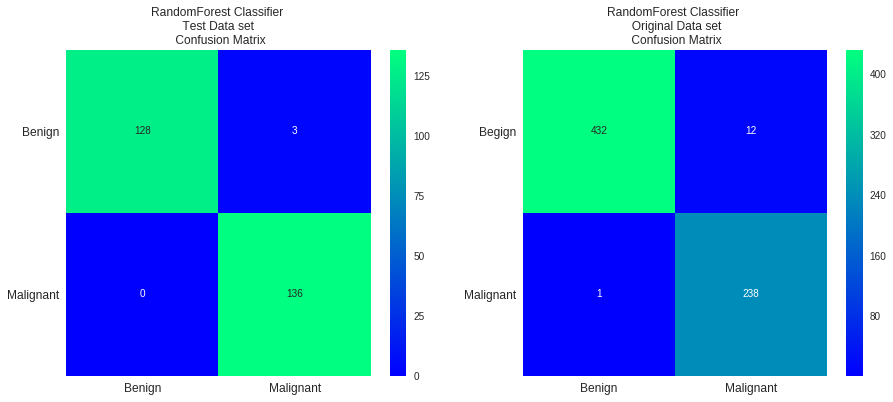

In [0]:
fig, ax = plt.subplots(1,2,figsize=(15,6), squeeze=False)

sns.heatmap(cf_test, ax=ax[0][0], annot=True, cmap=plt.cm.winter, fmt="d")
ax[0, 0].set_title("RandomForest Classifier \n Test Data set \n Confusion Matrix", fontsize=12)
ax[0, 0].set_xticklabels(['Benign', 'Malignant'], fontsize=12, rotation=0)
ax[0, 0].set_yticklabels(['Malignant', 'Benign'], fontsize=12, rotation=360)

sns.heatmap(cf_original, ax=ax[0][1], annot=True, cmap=plt.cm.winter, fmt="d")
ax[0, 1].set_title("RandomForest Classifier \n  Original Data set \n Confusion Matrix", fontsize=12)
ax[0, 1].set_xticklabels(['Benign', 'Malignant'], fontsize=12, rotation=0)
ax[0, 1].set_yticklabels(['Malignant', 'Begign'], fontsize=12, rotation=360)

From above confusion matrix, we can see that the model is performing relatively good on the test data set. On the original data set, the model perform better on identify Malignant correctly better than identify Benign correctly. This may due to the fact that our original data set have more Benign entries compare to Malignant entries. 

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

RFC_test_fpr, RFC_test_tpr, RFC_test_thresold = roc_curve(np.array(Y_test), Y_test_pred, pos_label=4)
RFC_org_fpr, RFC_org_tpr, RFC_org_thresold = roc_curve(np.array(Y_org), Y_org_pred, pos_label=4)

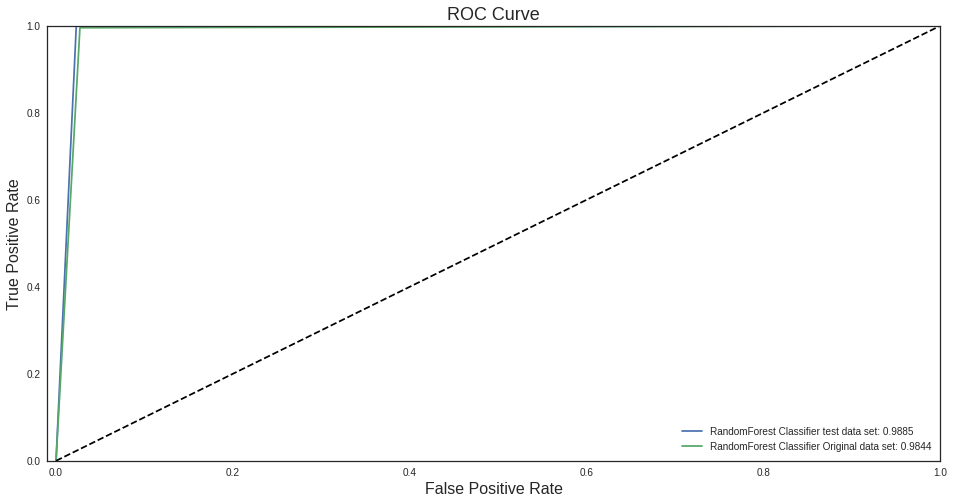

In [0]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve', fontsize=18)
plt.plot(RFC_test_fpr, RFC_test_tpr, label='RandomForest Classifier test data set: {:.4f}'.format(roc_auc_score(Y_test, Y_test_pred)))
plt.plot(RFC_org_fpr, RFC_org_tpr, label='RandomForest Classifier Original data set: {:.4f}'.format(roc_auc_score(Y_org, Y_org_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

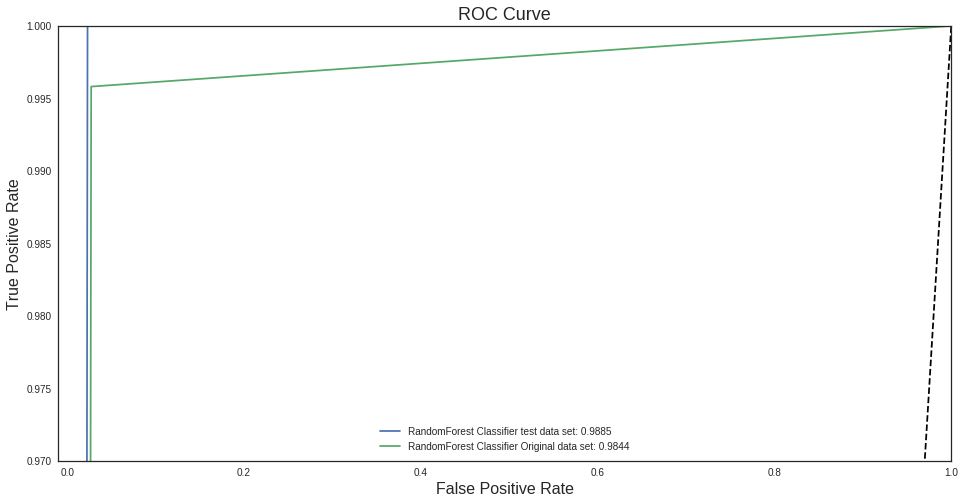

In [0]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve', fontsize=18)
plt.plot(RFC_test_fpr, RFC_test_tpr, label='RandomForest Classifier test data set: {:.4f}'.format(roc_auc_score(Y_test, Y_test_pred)))
plt.plot(RFC_org_fpr, RFC_org_tpr, label='RandomForest Classifier Original data set: {:.4f}'.format(roc_auc_score(Y_org, Y_org_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.ylim(0.97, 1)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

In [0]:
RFC_feature_importances = pd.DataFrame(RFC.feature_importances_,
                                       index=X_train.columns,
                                       columns=['importance']).sort_values('importance',ascending=False)

print(RFC_feature_importances)

                             importance
Uniformity of Cell Size        0.287910
Uniformity of Cell Shape       0.225918
Bare Nuclei                    0.161855
Single Epithelial Cell Size    0.092719
Bland Chromatin                0.077135
Normal Nucleoli                0.054997
Clump Thickness                0.051620
Marginal Adhesion              0.034745
Sample code number             0.008491
Mitoses                        0.004610
